In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
print(ride_data.shape)
city_data_df.shape


(2375, 4)


(120, 3)

In [3]:
# Combine the data into a single dataset
city_ride_merged=pd.merge(ride_data,city_data_df,on='city',how='inner')
city_ride_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# calculating the data for based on city
# creating a group by object by city
city_groupby=city_ride_merged.groupby('city')
Avg_fare_city=round(city_groupby['fare'].mean(),2)
# creating a dataframe by city
city_summary=pd.DataFrame(Avg_fare_city)
# * Total Number of Rides Per City
city_summary['Total_rides']=city_groupby['date'].count()
# Adding driver and type data to summary frame
Drivers=city_data_df[['city','driver_count','type']]
# print(Drivers)
city_summary=pd.merge(city_summary,Drivers,on='city',how='inner')
city_summary

,city,fare,Total_rides,driver_count,type
0,Amandaburgh,24.64,18,12,Urban
1,Barajasview,25.33,22,26,Urban
2,Barronchester,36.42,16,11,Suburban
3,Bethanyland,32.96,18,22,Suburban
4,Bradshawfurt,40.06,10,7,Rural
5,Brandonfort,35.44,19,10,Suburban
6,Carriemouth,28.31,27,52,Urban
7,Christopherfurt,24.50,27,41,Urban
8,Colemanland,30.89,22,23,Suburban
9,Davidfurt,32.00,17,23,Suburban


## Bubble Plot of Ride Sharing Data

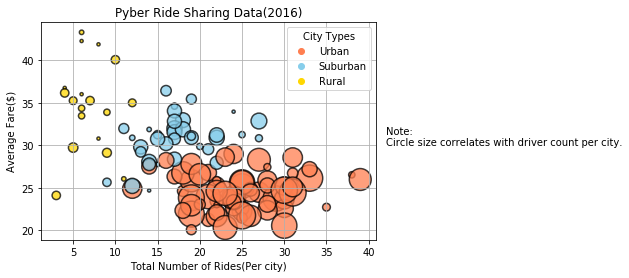

In [9]:
# # Unique category labels: 'D', 'F', 'G', ...
city_labels =['Urban','Suburban','Rural']

# # List of RGB triplets
rgb_values =['Coral','SkyBlue','Gold']

# # Map label to RGB
color_map = dict(zip(city_labels, rgb_values))
#Creating the plot
plt.scatter(city_summary['Total_rides'],city_summary['fare'],s=city_summary['driver_count']*10,alpha=.75,
            c=city_summary['type'].map(color_map),edgecolors='black',linewidths=1.5)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per city)")
plt.ylabel("Average Fare($)")

# # Create a legend

handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in rgb_values]
plt.legend(handlelist,city_labels,loc='upper right',title="City Types")
# # Create a legend
# lgnd = plt.legend(fontsize="small", mode="Expanded",
#                 numpoints=1, scatterpoints=1, loc= "upper right",title="City Types")

# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# plt.legend(scatterpoints=1,title="City Types",loc="upper right")
plt.text(42,30,"Note:\nCircle size correlates with driver count per city.")
# Incorporate a text label regarding circle size
plt.grid()
# Save Figure
# plt.tight_layout()
plt.savefig("Images/PyberBubbleplot.png")
plt.show()


## Total Fares by City Type

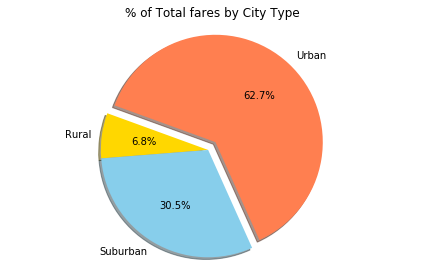

In [6]:
# Calculate Type Percents
city_type_groupby=city_ride_merged.groupby('type')

total_fares=city_type_groupby['fare'].sum()
#print(total_fares)
labels=['Rural','Suburban','Urban']
colors=['Gold','SkyBlue','Coral']
explode=(0,0,0.1)
plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total fares by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.tight_layout()
plt.savefig("Images/PyberfaresByCityType.png")
plt.show()


## Total Rides by City Type

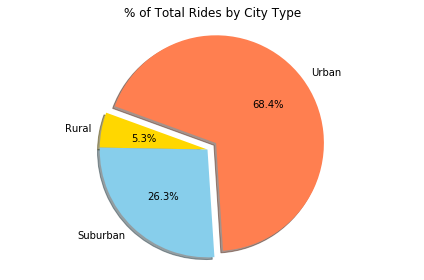

In [7]:
# Calculate Ride Percents
total_rides=city_type_groupby['ride_id'].count()
# print(total_rides)
labels=['Rural','Suburban','Urban']
colors=['Gold','SkyBlue','Coral']
explode=(0,0,0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.tight_layout()
plt.savefig("Images/PyberRidesByCityType.png")
plt.show()



## Total Drivers by City Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


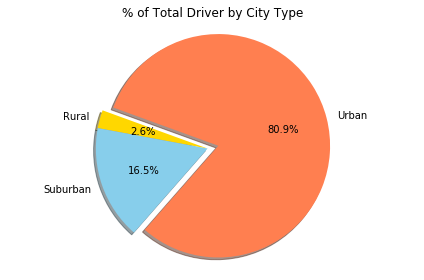

In [8]:
# Calculate Driver Percents

total_driver=city_data_df.groupby('type')['driver_count'].sum()
print(total_driver)
labels=['Rural','Suburban','Urban']
colors=['Gold','SkyBlue','Coral']
explode=(0,0,0.1)
plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Driver by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.tight_layout()
plt.savefig("Images/PyberDriverByCityType.png")
plt.show()


